In [21]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv('Covid_Curat_edited.csv', index_col='location')
df = df.drop(df.columns[0], axis=1)
df

,FirsDate,LastDate,hosp_patients,aged_70_older,gdp_per_capita,human_development_index,number_samples
location,,,,,,,
Austria,01/04/2020,30/11/2020,159780,13.748,45436.686,0.922,381
Canada,09/03/2020,30/11/2020,305442,10.797,44017.591,0.929,788
Denmark,02/04/2020,30/11/2020,30162,12.325,46682.515,0.940,329
Estonia,06/01/2020,30/11/2020,11565,13.491,29481.252,0.892,221
Finland,21/03/2020,30/11/2020,14274,13.264,40585.721,0.938,526
France,24/01/2020,30/11/2020,3788274,13.079,38605.671,0.901,154
Israel,02/03/2020,30/11/2020,192271,7.359,33132.320,0.919,520
Italy,24/02/2020,30/11/2020,3194970,16.240,35220.084,0.892,359
Netherlands,27/02/2020,30/11/2020,244482,11.881,48472.545,0.944,900


In [23]:
pop = pd.read_csv("population_edited.csv") #this is population data from World Bank
pop = pop.rename(columns = {'Country Name': 'location'})
pop = pop.set_index('location')
pop

,2020
location,
Aruba,106766.0
Africa Eastern and Southern,677243299.0
Afghanistan,38928341.0
Africa Western and Central,458803476.0
Angola,32866268.0
...,...
Kosovo,1775378.0
"Yemen, Rep.",29825968.0
South Africa,59308690.0


In [24]:
## add population to new column
# look up in new dataset using df
df2 = pd.merge(df, pop, on = 'location')
df2 = df2.rename(columns = {'2020': 'population'})
data = df2
data

,FirsDate,LastDate,hosp_patients,aged_70_older,gdp_per_capita,human_development_index,number_samples,population
location,,,,,,,,
Austria,01/04/2020,30/11/2020,159780,13.748,45436.686,0.922,381,8917205.0
Canada,09/03/2020,30/11/2020,305442,10.797,44017.591,0.929,788,38005238.0
Denmark,02/04/2020,30/11/2020,30162,12.325,46682.515,0.940,329,5831404.0
Estonia,06/01/2020,30/11/2020,11565,13.491,29481.252,0.892,221,1331057.0
Finland,21/03/2020,30/11/2020,14274,13.264,40585.721,0.938,526,5530719.0
France,24/01/2020,30/11/2020,3788274,13.079,38605.671,0.901,154,67391582.0
Israel,02/03/2020,30/11/2020,192271,7.359,33132.320,0.919,520,9216900.0
Italy,24/02/2020,30/11/2020,3194970,16.240,35220.084,0.892,359,59554023.0
Netherlands,27/02/2020,30/11/2020,244482,11.881,48472.545,0.944,900,17441139.0


In [25]:
# now divide hosp  by pop
data["hosp_by_pop"] = data.apply(lambda x: round((x.hosp_patients/x.population)*100000,2), axis=1)
data = data.sort_values("hosp_by_pop")
data

,FirsDate,LastDate,hosp_patients,aged_70_older,gdp_per_capita,human_development_index,number_samples,population,hosp_by_pop
location,,,,,,,,,
Finland,21/03/2020,30/11/2020,14274,13.264,40585.721,0.938,526,5530719.0,258.09
Denmark,02/04/2020,30/11/2020,30162,12.325,46682.515,0.940,329,5831404.0,517.23
Canada,09/03/2020,30/11/2020,305442,10.797,44017.591,0.929,788,38005238.0,803.68
Estonia,06/01/2020,30/11/2020,11565,13.491,29481.252,0.892,221,1331057.0,868.86
Netherlands,27/02/2020,30/11/2020,244482,11.881,48472.545,0.944,900,17441139.0,1401.75
Austria,01/04/2020,30/11/2020,159780,13.748,45436.686,0.922,381,8917205.0,1791.82
United States,15/07/2020,30/11/2020,5984109,9.732,54225.446,0.926,157,329484123.0,1816.21
Spain,20/08/2020,30/11/2020,932331,13.799,34272.360,0.904,114,47351567.0,1968.95
Israel,02/03/2020,30/11/2020,192271,7.359,33132.320,0.919,520,9216900.0,2086.07


In [26]:
#data = data.reset_index()

In [27]:
# filter countries
#“DNK”,“ESP”,“ITA”,“DEU”,“AUT”,“LUX”, “FRA”,“NLD”, “SWE”, “GBR”, “USA”,“FIN”
#data_countries = data[data.location.isin(["Denmark", "Spain", "Italy", "Germany", "Austria", "Luxembourg", "France",
#                                         "Netherlands", "Sweden", "United Kingdom", "United States", "Finland"])]
#data_countries = data_countries.set_index("location")
#data_countries

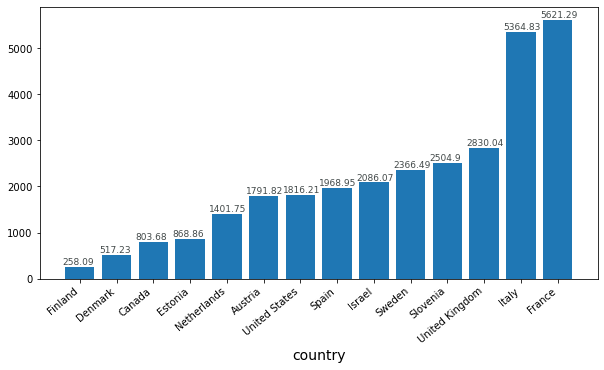

In [28]:
## Visualise in a bar chart
# measurements of chart

bar_width = 0.5
plt.rcParams['figure.figsize'] = [10,5] 

# set bar and label properties
plt.bar(data.index, data["hosp_by_pop"])

plt.xlabel("country", fontsize = 14)
plt.xticks(rotation=40, ha="right")

for index, value in enumerate(data.hosp_by_pop):
    #print(index,value)
    plt.text(index -0.48, value+50, str(value), color='#424949', fontsize = 9)


plt.show()

In [29]:
print(np.percentile(data.hosp_by_pop, 33))
print(np.percentile(data.hosp_by_pop, 66))
print(round(np.mean(data.hosp_by_pop),3))

1514.8703
2248.7136
2157.158


In [30]:
# calculate how many samples would be in each group if mean is used as cut-off
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()
threshold = w_avg(data, 'hosp_by_pop', 'number_samples')
threshold

1853.7325673733383

In [31]:
print("group LOW:", data[data.hosp_by_pop < threshold].number_samples.sum(axis=0))
print("group HIGH:", data[data.hosp_by_pop > threshold].number_samples.sum(axis=0))

group LOW: 3302
group HIGH: 2264


In [32]:
print("LOW")
print(data[data.hosp_by_pop < threshold].index)

LOW
Index(['Finland', 'Denmark', 'Canada', 'Estonia', 'Netherlands', 'Austria',
       'United States'],
      dtype='object', name='location')


In [33]:
print("HIGH")
print(data[data.hosp_by_pop > threshold].index)

HIGH
Index(['Spain', 'Israel', 'Sweden', 'Slovenia', 'United Kingdom', 'Italy',
       'France'],
      dtype='object', name='location')


In [36]:
# save file
data.to_csv("Covid_Curat_edited2.csv")